# Clustering

## Import des Datensatzes

In [1]:
# Importieren der notwendigen Bibliothek für die Datenverarbeitung
import pandas as pd

# Spezifizieren der URL, von der der Datensatz geladen wird
url = 'https://raw.githubusercontent.com/johanneskolb/ki-kurs-clustering/main/datensatz_clustering.csv'

# Einlesen des Datensatzes von der angegebenen URL in einen Pandas DataFrame
# Das Trennzeichen für die Daten ist ein Semikolon (;)
df = pd.read_csv(url, sep=';')

## Datensatz bereinigen

In [2]:
# Ausgeben der Anzahl von NaN-Werten in jeder Spalte des DataFrames
nan_counts = df.isna().sum()
print("Anzahl der NaN-Werte pro Spalte:\n", nan_counts)

# Entfernen von Zeilen, die NaN-Werte enthalten, und Änderungen direkt im bestehenden DataFrame anwenden
df.dropna(inplace=True)


Anzahl der NaN-Werte pro Spalte:
 name                  0
alter                 0
nettoeinkommen_eur    0
dtype: int64


## Erste Dateninspektion

In [3]:
# Ausgeben der ersten fünf Zeilen des DataFrames
print("Erste fünf Zeilen des Datensatzes:\n", df.head())

# Ausgeben der Dimensionen des DataFrames (Anzahl der Zeilen und Spalten)
print("\nDimensionen des Datensatzes (Zeilen, Spalten):", df.shape)

# Generieren und Ausgeben einer statistischen Zusammenfassung des DataFrames
# Dies umfasst Maßnahmen wie den Durchschnitt, den Median und die Standardabweichung für jede Spalte
print("\nStatistische Zusammenfassung der Variablen:\n", df.describe())


Erste fünf Zeilen des Datensatzes:
     name  alter  nettoeinkommen_eur
0  Felix     77                7573
1   Amir     77                6864
2  Anton     75                3048
3   Sara     22                2854
4    Lio     67                4872

Dimensionen des Datensatzes (Zeilen, Spalten): (80, 3)

Statistische Zusammenfassung der Variablen:
           alter  nettoeinkommen_eur
count  80.00000           80.000000
mean   51.00000         5546.662500
std    17.97537         2330.259832
min    21.00000         1561.000000
25%    36.00000         3287.000000
50%    49.50000         5630.000000
75%    64.25000         7423.500000
max    84.00000         9414.000000


## Daten skalieren

In [4]:
#Stellt sicher, dass alle Features auf der gleichen Skala sind

# Importieren der StandardScaler-Klasse zur Durchführung der z-Score-Normalisierung
from sklearn.preprocessing import StandardScaler

# Erstellen einer Instanz des StandardScaler
scaler = StandardScaler()

# Anwenden des StandardScalers auf die Spalten 'nettoeinkommen_eur' und 'alter'
# Dies zentriert und skaliert die Daten, sodass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben
df[['nettoeinkommen_eur_t', 'alter_t']] = scaler.fit_transform(df[['nettoeinkommen_eur', 'alter']])

# Ausgeben der ersten fünf Zeilen des aktualisierten DataFrames zur Überprüfung
print("Erste fünf Zeilen des zentrierten und skalierten Datensatzes:\n", df.head())

Erste fünf Zeilen des zentrierten und skalierten Datensatzes:
     name  alter  nettoeinkommen_eur  nettoeinkommen_eur_t   alter_t
0  Felix     77                7573              0.875062  1.455549
1   Amir     77                6864              0.568885  1.455549
2  Anton     75                3048             -1.079033  1.343584
3   Sara     22                2854             -1.162811 -1.623497
4    Lio     67                4872             -0.291349  0.895723


## Skalierten Datensatz visualisieren

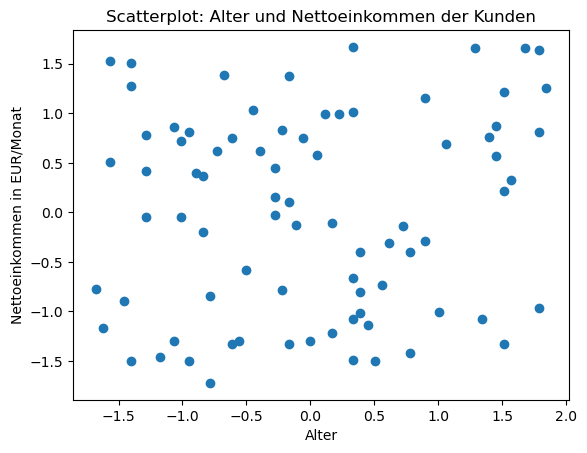

In [5]:
# Importieren der notwendigen Bibliothek für die Datenvisualisierung
import matplotlib.pyplot as plt

# Konfigurieren von Jupyter Notebook, um Plots direkt im Notebook anzuzeigen
%matplotlib inline

# Erstellen eines Scatterplots für die Datenpunkte in den Spalten 'alter' und 'nettoeinkommen_eur'
plt.scatter(df['alter_t'], df['nettoeinkommen_eur_t'])

# Hinzufügen von Achsenbeschriftungen
plt.xlabel('Alter')
plt.ylabel('Nettoeinkommen in EUR/Monat')

# Setzen eines Titels für den Scatterplot
plt.title('Scatterplot: Alter und Nettoeinkommen der Kunden')

# Anzeigen des Scatterplots
plt.show()